# Maths....

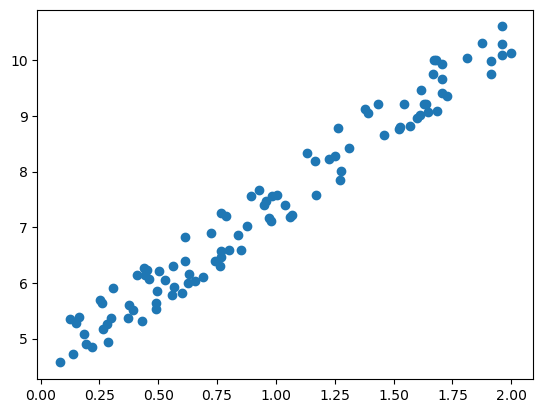

In [21]:
import numpy as np
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100, 1)

plt.scatter(X, y)

In [27]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

theta_best

array([[4.50762126],
       [2.94426916]])

With the above and what is about to come..... yeah this is over my head, and I got a HD for calculus and linear algebra

In [30]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.50762126],
       [10.39615958]])

Yep, still no idea whats going on right now, feeling very inadaquent

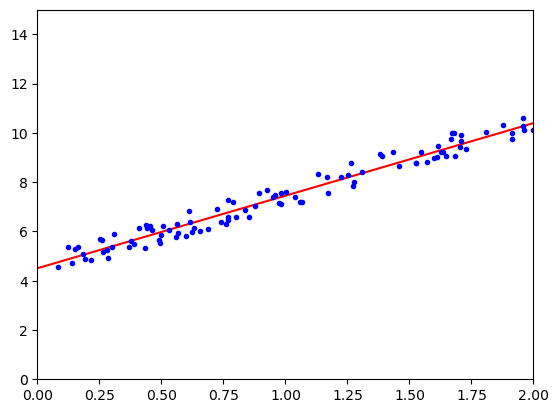

In [35]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

Ok so i understand that code and what's happening, just not how we built that above, but we will continue!

In [38]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.50762126]), array([[2.94426916]]))

In [40]:
lin_reg.predict(X_new)

array([[ 4.50762126],
       [10.39615958]])

### Stochastic Gradient Decent

In [43]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty = None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

sgd_reg.intercept_, sgd_reg.coef_

(array([4.47469853]), array([2.94189822]))

woooooo...hoooo

# Polynomial Regression 

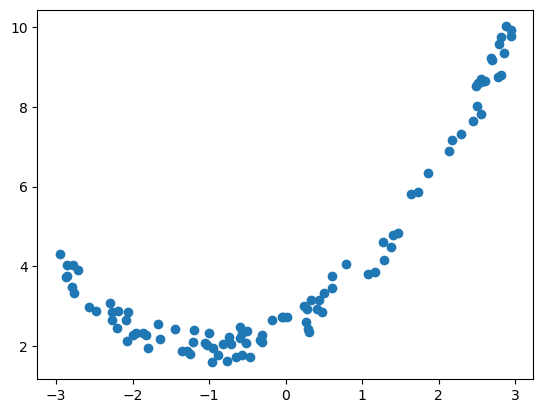

In [57]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X **2 + X + 2 + np.random.rand(m, 1)

plt.scatter(X, y)

We cant fit a linear line to this but we are about to do some black magic here to make this work... no no no not bit shifting type magic, just some math and indexing type boring stuff

In [60]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 2, include_bias = False)
X_poly = poly.fit_transform(X)

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.4806597]), array([[1.01188083, 0.51351315]]))

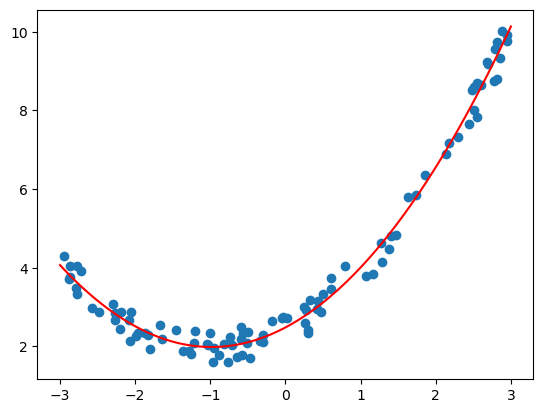

In [74]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.scatter(X, y)
plt.plot(X_new, y_new, "r-")

I seriously dont get it....

A whole bunch of stuff far above my pay grade went down.... and now we are here

# Decision boundaries

In [79]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [99]:
X = iris["data"][:, 3:]
y = (iris["target"] == 2).astype(np.int32)

In [101]:
from sklearn.linear_model import LogisticRegression


log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

Text([1.68066066], 0.15, 'Decision  boundary')

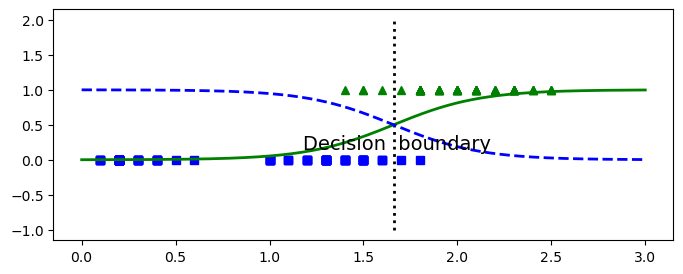

In [113]:

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")




Kinda fed up with this way of learning at the moment..... im just like stumbling through concepts I know with math that Im vaguely familiar with, typing out provided code.... so dry and boring right now

Learning bit shifting in C today was so much more fun, like actual time of my life stuff... this should also be incredibley fun, but it aint
